1. Tree Pose (Vriksasana)
2. Downward-Facing Dog (Adho Mukha Svanasana)
3. Upward-Facing Dog (Urdhva Mukha Svanasana)
4. Seated Forward Fold ( Paschimottanasana )
5. Bridge Pose (Setubandhasana)

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download shrutisaxena/yoga-pose-image-classification-dataset/metadata

 98% 988M/0.98G [00:06<00:00, 182MB/s]
100% 0.98G/0.98G [00:06<00:00, 161MB/s]


In [ ]:
%%capture
!unzip yoga-pose-image-classification-dataset.zip

In [ ]:
!mkdir "./dataset/aaaaaaa selected/"
!cp -r "./dataset/vriksasana" "./dataset/aaaaaaa selected/"
!cp -r "./dataset/adho mukha svanasana" "./dataset/aaaaaaa selected/"
!cp -r "./dataset/urdhva mukha svanasana" "./dataset/aaaaaaa selected/"
!cp -r "./dataset/paschimottanasana" "./dataset/aaaaaaa selected/"
!cp -r "./dataset/setu bandha sarvangasana" "./dataset/aaaaaaa selected/"

# !cp -r "./dataset/tadasana" "./dataset/aaaaaaa selected/"
# !cp -r "./dataset/uttana shishosana" "./dataset/aaaaaaa selected/"
# !cp -r "./dataset/savasana" "./dataset/aaaaaaa selected/"
# !cp -r "./dataset/ardha chandrasana" "./dataset/aaaaaaa selected/"
# !cp -r "./dataset/dhanurasana" "./dataset/aaaaaaa selected/"



In [ ]:
# !mkdir "/content/selected/"
!cp -r "/content/dataset/aaaaaaa selected/" "/content/selected/"


In [ ]:
!rm -frd "/content/dataset/"

In [ ]:
!mkdir "/content/train"
!mkdir "/content/test"
!mkdir "/content/validate"

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import re
import numpy as np

try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
import argparse
import imutils
import pickle

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
dataset_path = '/content/selected'

In [ ]:
import shutil, sys
def partition_pct(lst, point):
    idx = int(len(lst) * point)
    return lst[:idx], lst[idx:]
dirs=os.listdir(dataset_path)
for asan in dirs:
  print("==>",asan)
  cnv_list_70, cnv_list_30 = partition_pct(os.listdir(dataset_path+'/'+asan) , .7)
  cnv_list_25, cnv_list_5 = partition_pct(cnv_list_30 , .75)
  for (file_list, dirname) in ((cnv_list_70, '/content/train'),
                               (cnv_list_25, '/content/validate'),
                              (cnv_list_5, '/content/test')):
    for f in file_list:
          if not os.path.exists(dirname+'/'+asan):
            os.makedirs(dirname+'/'+asan)
          shutil.copy('/content/selected'+'/'+asan+'/'+f, dirname+'/'+asan)

==> dhanurasana
==> ardha chandrasana
==> adho mukha svanasana
==> setu bandha sarvangasana
==> tadasana
==> vriksasana
==> urdhva mukha svanasana
==> savasana
==> paschimottanasana
==> uttana shishosana


In [ ]:
dirs=os.listdir("/content/test")
count=0
for dir in dirs:
  if os.path.isdir("/content/test"+'/'+dir):
    for f in os.listdir("/content/test/"+dir):
      # print("Moving: "+"/content/test/"+dir+"==>"+f)
      # if os.path.exists("/content/test/"+dir+"/"+f):
      shutil.move("/content/test/"+dir+"/"+f,"/content/test/"+str(count)+".png")
      count=count+1
    os.rmdir("/content/test/"+dir)

In [ ]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 1000
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:

labels = []
label = []
dataset_path = '/content/train'
dirs=os.listdir(dataset_path)
dirs.sort()
print(len(dirs))
for directory in dirs:
  label = []
  label.append(directory)
  labels.append(label)

labels.sort()
print(labels)

10
[['adho mukha svanasana'], ['ardha chandrasana'], ['dhanurasana'], ['paschimottanasana'], ['savasana'], ['setu bandha sarvangasana'], ['tadasana'], ['urdhva mukha svanasana'], ['uttana shishosana'], ['vriksasana']]


In [ ]:
# binarize the labels using scikit-learn's special multi-label
# binarizer implementation
print("[INFO] class labels:")
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

[INFO] class labels:
1. adho mukha svanasana
2. ardha chandrasana
3. dhanurasana
4. paschimottanasana
5. savasana
6. setu bandha sarvangasana
7. tadasana
8. urdhva mukha svanasana
9. uttana shishosana
10. vriksasana


### **Remove other dirs from test**

In [ ]:
# dirs=os.listdir("/content/test")
# for dir in dirs:
#   if os.path.isdir("/content/test"+'/'+dir):
#     # print(dir)
#     shutil.rmtree("/content/test"+'/'+dir)

In [ ]:
# dataset_path="/content/dataset/train"

In [ ]:
"""
Parameters
"""
img_width, img_height = 150, 150
IMG_WIDTH, IMG_HEIGHT = 150, 150
batch_size = 16
samples_per_epoch = 2
validation_steps = 400/16
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 3
lr = 0.0004

In [ ]:
# model = Sequential()
# model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, padding ="same", input_shape=(img_width, img_height, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

# model.add(Flatten())
# model.add(Dense(256))
# model.add(Activation("relu"))
# model.add(Dropout(0.5))
# model.add(Dense(classes_num, activation='softmax'))

model = tf.keras.Sequential ()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 128)               44859520  
                                                        

In [ ]:
train_image_generator = ImageDataGenerator(
                          rescale=1. / 255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True)
validation_image_generator = ImageDataGenerator(
                          rescale=1. / 255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_dir="/content/train"
validation_dir="/content/validate"
test_dir="/content/test"

train_data_gen = train_image_generator.flow_from_directory(
        train_dir,
        batch_size=batch_size,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='categorical',
        color_mode = 'rgb',
        subset = 'training')

val_data_gen = validation_image_generator.flow_from_directory(
        validation_dir,
        batch_size=batch_size,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='categorical',
        color_mode = 'rgb',
        subset = 'training')

test_data_gen = test_image_generator.flow_from_directory(
        '/content',
        classes=['test'], 
        batch_size=batch_size,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='categorical',
        color_mode = 'rgb',
        shuffle=False)

Found 395 images belonging to 10 classes.
Found 126 images belonging to 10 classes.
Found 48 images belonging to 1 classes.


plot images function

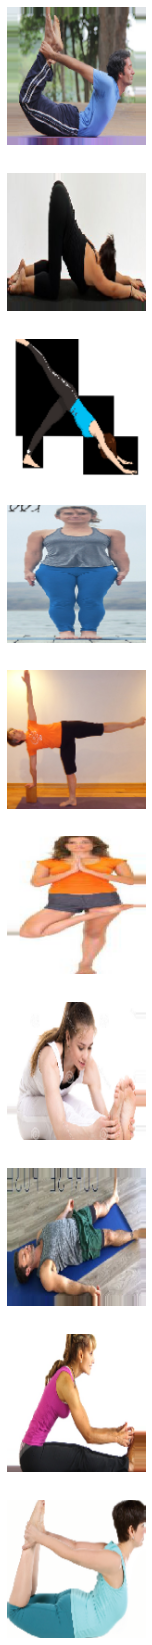

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:10])

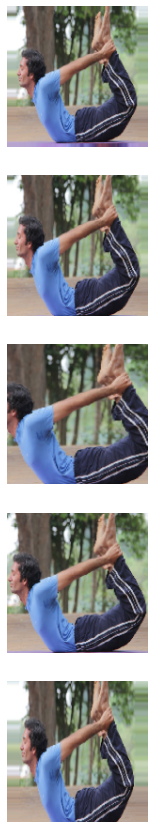

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [ ]:
# model = tf.keras.Sequential ()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

**Total**

In [ ]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
# total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
# total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
# total_test = len(os.listdir(test_dir))
# print(total_train,total_val,total_test)


Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [ ]:
from keras import callbacks

In [ ]:
"""
Tensorboard log
"""
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

In [ ]:
epochs = 5

In [ ]:
# history = model.fit(
#         x=train_data_gen,
#         steps_per_epoch=10,
#         epochs=epochs,
#         validation_data=val_data_gen,
#         validation_steps=total_val // batch_size)

history = model.fit(
          train_data_gen,
          steps_per_epoch=3,
          epochs=5,
          validation_data=val_data_gen,
          callbacks=cbks,
          validation_steps=validation_steps)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3/3 [==============================] - 10s 4s/step - loss: 6.5113 - accuracy: 0.1250 - val_loss: 2.3426 - val_accuracy: 0.0714
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.4058 - accuracy: 0.0833
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 2.3048 - accuracy: 0.1250
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 2.2971 - accuracy: 0.1667
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 2.2642 - accuracy: 0.1250


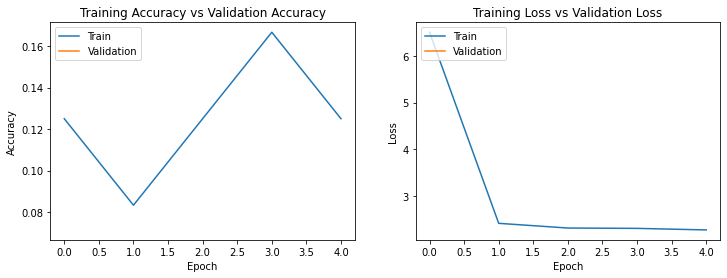

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

In [ ]:
# save the multi-label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open("/content/labels", "wb")
f.write(pickle.dumps(mlb))
f.close()

[INFO] serializing label binarizer...


In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format keras /content/models/model.h5 /content/models/model

# **Testing**

In [ ]:

labels = []
label = []
dataset_path = '/content/train'
dirs=os.listdir(dataset_path)
dirs.sort()
print(len(dirs))
for directory in dirs:
  label = []
  label.append(directory)
  labels.append(label)

print(labels)

10
[['adho mukha svanasana'], ['ardha chandrasana'], ['dhanurasana'], ['paschimottanasana'], ['savasana'], ['setu bandha sarvangasana'], ['tadasana'], ['urdhva mukha svanasana'], ['uttana shishosana'], ['vriksasana']]


In [ ]:
from keras.models import load_model

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(labels)

MultiLabelBinarizer()

[INFO] loading network...
[INFO] classifying image...
[0.03561656 0.63956106 0.00355967 0.00125319 0.29040664 0.00522162
 0.00081944 0.00176124 0.00648952 0.01531097]


adho mukha svanasana: 3.56%
ardha chandrasana: 63.96%
dhanurasana: 0.36%
paschimottanasana: 0.13%
savasana: 29.04%
setu bandha sarvangasana: 0.52%
tadasana: 0.08%
urdhva mukha svanasana: 0.18%
uttana shishosana: 0.65%
vriksasana: 1.53%


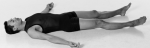

ardha chandrasana



[INFO] loading network...
[INFO] classifying image...
[1.0744006e-04 3.3926146e-04 2.8437348e-03 9.3683195e-01 1.0672929e-02
 1.5611572e-03 6.9166905e-05 4.5480665e-02 1.8264923e-03 2.6712529e-04]


adho mukha svanasana: 0.01%
ardha chandrasana: 0.03%
dhanurasana: 0.28%
paschimottanasana: 93.68%
savasana: 1.07%
setu bandha sarvangasana: 0.16%
tadasana: 0.01%
urdhva mukha svanasana: 4.55%
uttana shishosana: 0.18%
vriksasana: 0.03%


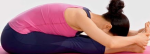

paschimottanasana



[INFO] loading network...
[INFO] classifying image...
[0.05767554 0.02242054 0.0078576  0.05741852 0.5097134  0.02986798
 0.01630984 0.03546144 0.23339657 0.02987856]


adho mukha svanasana: 5.77%
ardha chandrasana: 2.24%
dhanurasana: 0.79%
paschimottanasana: 5.74%
savasana: 50.97%
setu bandha sarvangasana: 2.99%
tadasana: 1.63%
urdhva mukha svanasana: 3.55%
uttana shishosana: 23.34%
vriksasana: 2.99%


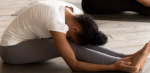

savasana





In [ ]:
i=0
test_dir = '/content/test'
list = os.listdir(test_dir)
random.shuffle(list)
for each_image in list:
  if(i>=3): break
  # print(each_image)
  # load the image
  image = cv2.imread(test_dir+'/'+each_image)
  # print(image)
  output = imutils.resize(image, width=150, height=150)

  # pre-process the image for classification
  image = cv2.resize(image, (150, 150))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)


  # load the trained convolutional neural network and the multi-label
  # binarizer
  print("[INFO] loading network...")
  model = load_model("/content/models/model.h5")
  mlb = pickle.loads(open("/content/labels", "rb").read())
  # classify the input image then find the indexes of the two class
  # labels with the *largest* probability
  print("[INFO] classifying image...")
  proba = model.predict(image)[0]
  print(proba)
  # idxs = np.argsort(proba)[::-1][:1]
  idxs = np.argsort(proba)[::-1][:4]


  print("\n");

  # print(idxs)

  # loop over the indexes of the high confidence class labels
  # for (i, j) in enumerate(idxs):
  # 	# build the label and draw the label on the image
  # 	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
  #   # print(label)
  # 	cv2.putText(output, label, (1, (i * 10) + 25), 
  # 		cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
  # # show the probabilities for each of the individual labels
  max_proba = 0
  final_label = ""
  for (label, p) in zip(mlb.classes_, proba):
    print("{}: {:.2f}%".format(label, p * 100))
    if(max_proba<p*100):
        max_proba = p*100
        final_label = label
    
  # show the output image
  cv2_imshow(output)
  cv2.waitKey(0)
  print(final_label)
  print("\n\n")

  i=i+1
